In [152]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression, LogisticRegression, LogisticRegressionCV, Ridge
from sklearn.preprocessing import PolynomialFeatures
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
df = pd.read_csv("/Users/saikatbasu/Documents/PersonalInformation_Oct2022/IBMDataScience-Coursera/DataAnalysisWithPython-7of12/Module5-ModelEvaluation&Refinement/module_5_auto.csv")

In [48]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

In [12]:
df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0', 'symboling'], inplace=True)

In [62]:
#Single Linear Regression
slr = LinearRegression()

In [22]:
y = df['price']
X = df[['horsepower']]

In [76]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [77]:
slr.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [78]:
yhat_train = slr.predict(X_train)
yhat_test = slr.predict(X_test)
slr.score(X_train,y_train)

0.6423115922166707

In [79]:
cross_val_score(slr,X_train,y_train,cv=4)

array([0.5543405 , 0.68047034, 0.53835622, 0.58980577])

In [80]:
cross_val_score(slr,X_test,y_test,cv=4)

array([ 0.71124291,  0.80959886,  0.63422432, -2.96452704])

In [81]:
yhat_xval_train = cross_val_predict(slr, X_train,y_train,cv=4)
yhat_xval_test = cross_val_predict(slr, X_test, y_test,cv=4)

/var/folders/vr/zjpq5dd116q29x13knn7gxb00000gn/T/ipykernel_83823/748141875.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_train,hist=False,color='r',label="Actual Train Data Price")
/var/folders/vr/zjpq5dd116q29x13knn7gxb00000gn/T/ipykernel_83823/748141875.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de441

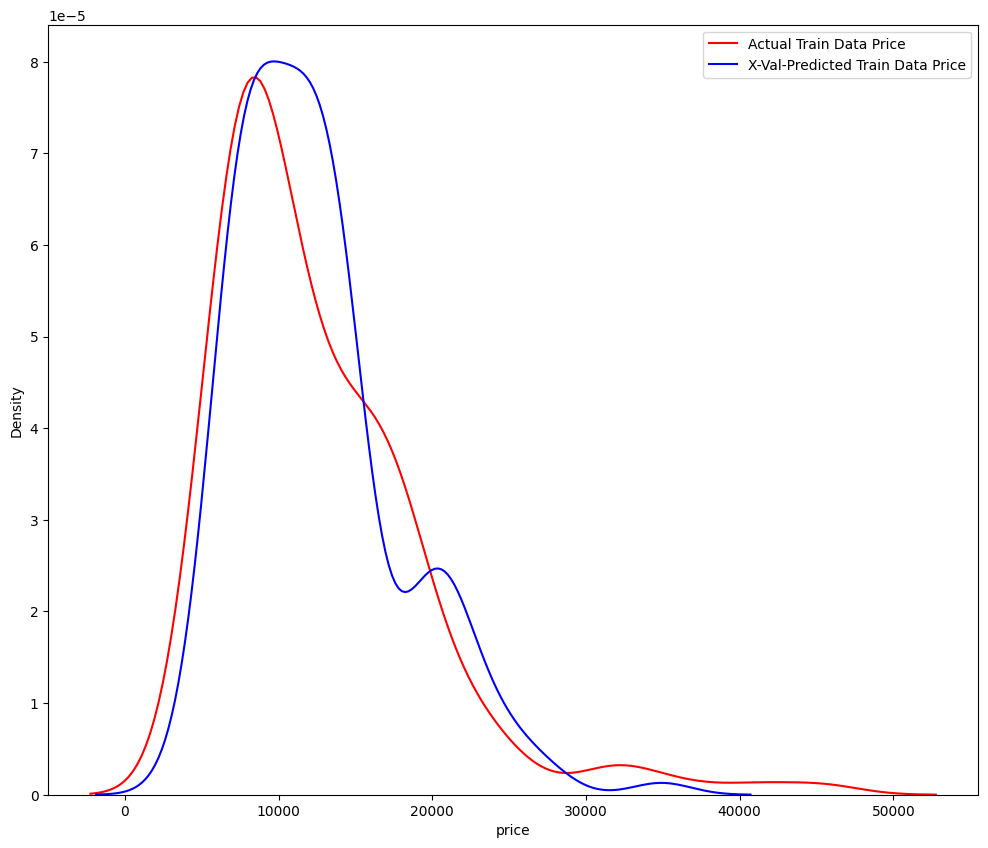

In [82]:
plt.figure(figsize=[12,10])
ax1 = sns.distplot(y_train,hist=False,color='r',label="Actual Train Data Price")
sns.distplot(yhat_xval_train,hist=False,color='b',label="X-Val-Predicted Train Data Price")
plt.legend()

/var/folders/vr/zjpq5dd116q29x13knn7gxb00000gn/T/ipykernel_83823/3086177215.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_test,hist=False,color='r',label="Actual Test Data Price")
/var/folders/vr/zjpq5dd116q29x13knn7gxb00000gn/T/ipykernel_83823/3086177215.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de441

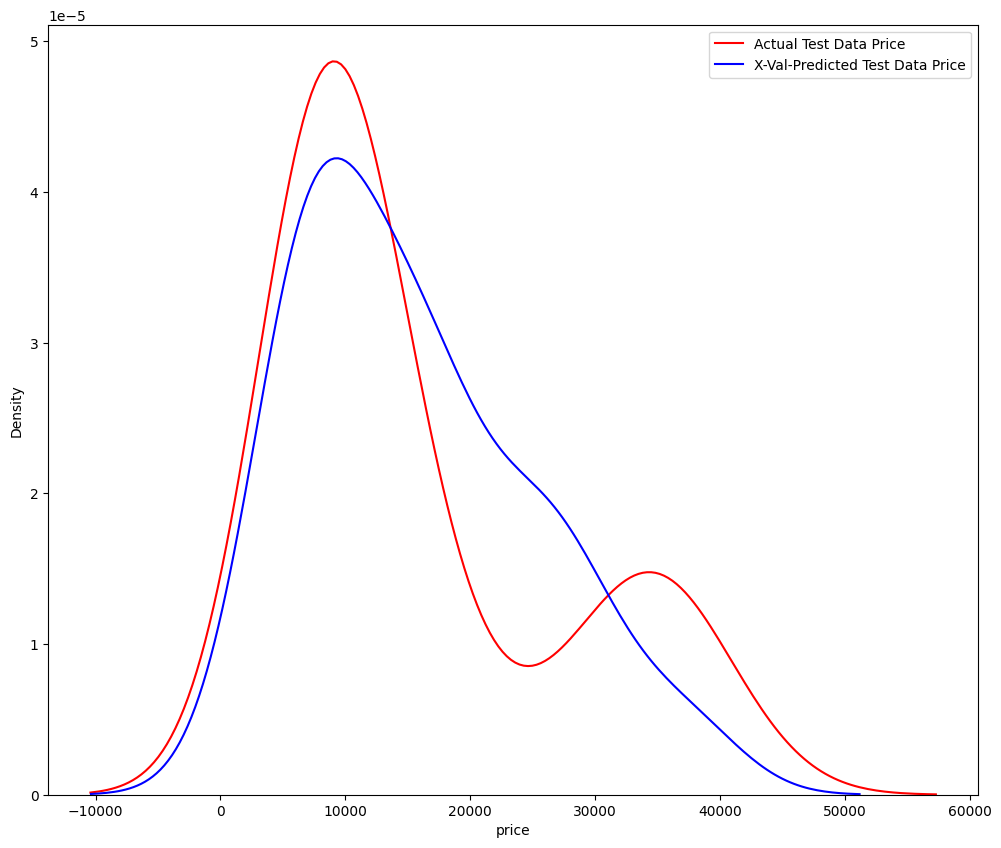

In [83]:
plt.figure(figsize=[12,10])
ax1 = sns.distplot(y_test,hist=False,color='r',label="Actual Test Data Price")
sns.distplot(yhat_xval_test,hist=False,color='b',label="X-Val-Predicted Test Data Price")
plt.legend()

In [84]:
yhat_train = slr.predict(X_train)
yhat_test = slr.predict(X_test)

/var/folders/vr/zjpq5dd116q29x13knn7gxb00000gn/T/ipykernel_83823/1884269354.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_train, hist=False, color='r',label="Actual Train Data Price")
/var/folders/vr/zjpq5dd116q29x13knn7gxb00000gn/T/ipykernel_83823/1884269354.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/d

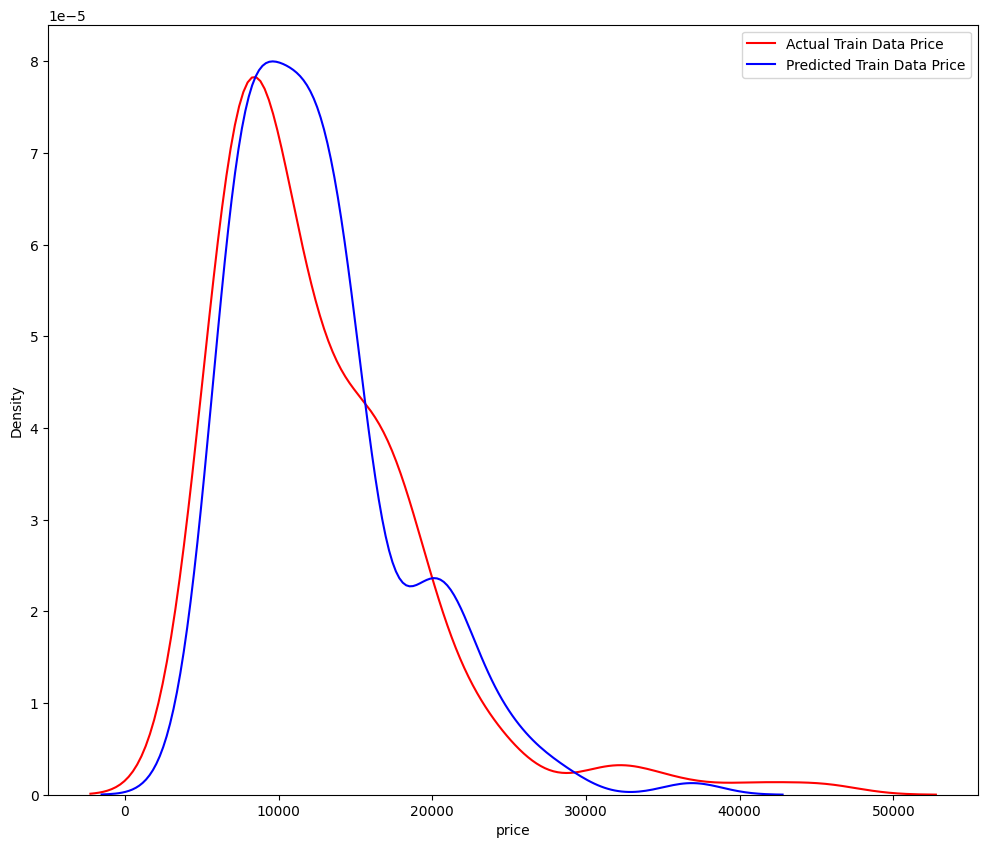

In [85]:
plt.figure(figsize=[12,10])
ax1 = sns.distplot(y_train, hist=False, color='r',label="Actual Train Data Price")
sns.distplot(yhat_train,hist=False,color='b',label="Predicted Train Data Price")
plt.legend()

/var/folders/vr/zjpq5dd116q29x13knn7gxb00000gn/T/ipykernel_83823/904604006.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_test, hist=False, color='r',label="Actual Test Data Price")
/var/folders/vr/zjpq5dd116q29x13knn7gxb00000gn/T/ipykernel_83823/904604006.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de441

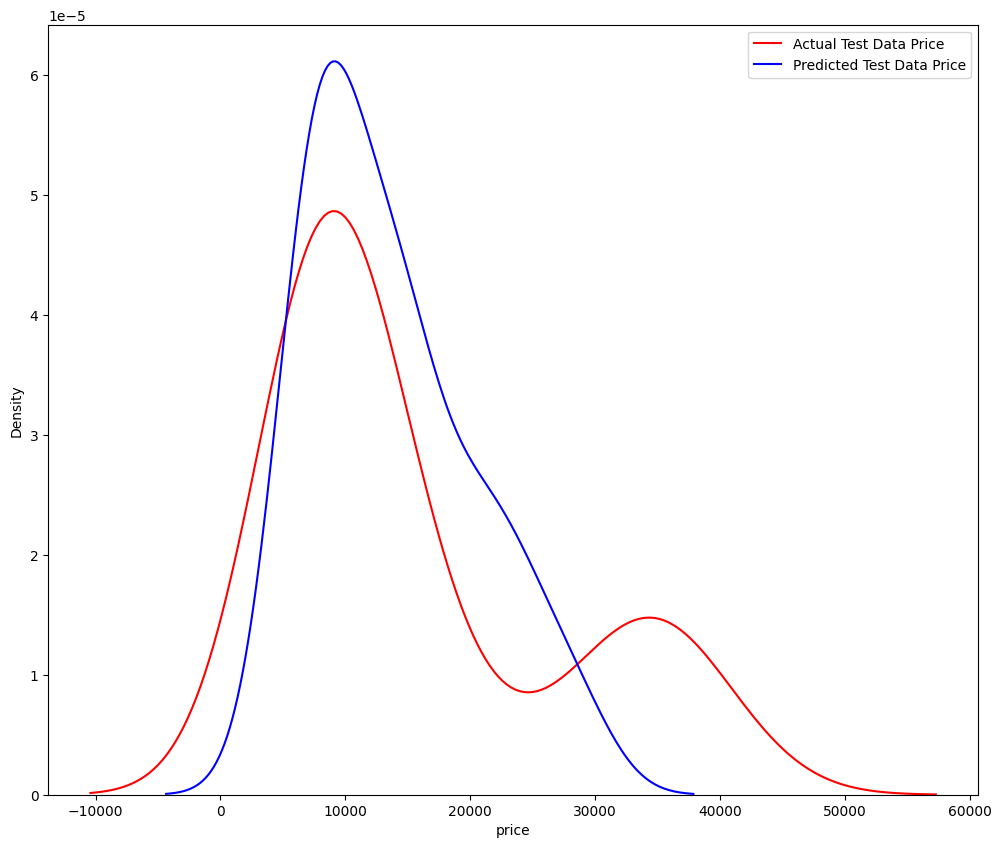

In [86]:
plt.figure(figsize=[12,10])
ax1 = sns.distplot(y_test, hist=False, color='r',label="Actual Test Data Price")
sns.distplot(yhat_test,hist=False,color='b',label="Predicted Test Data Price")
plt.legend()

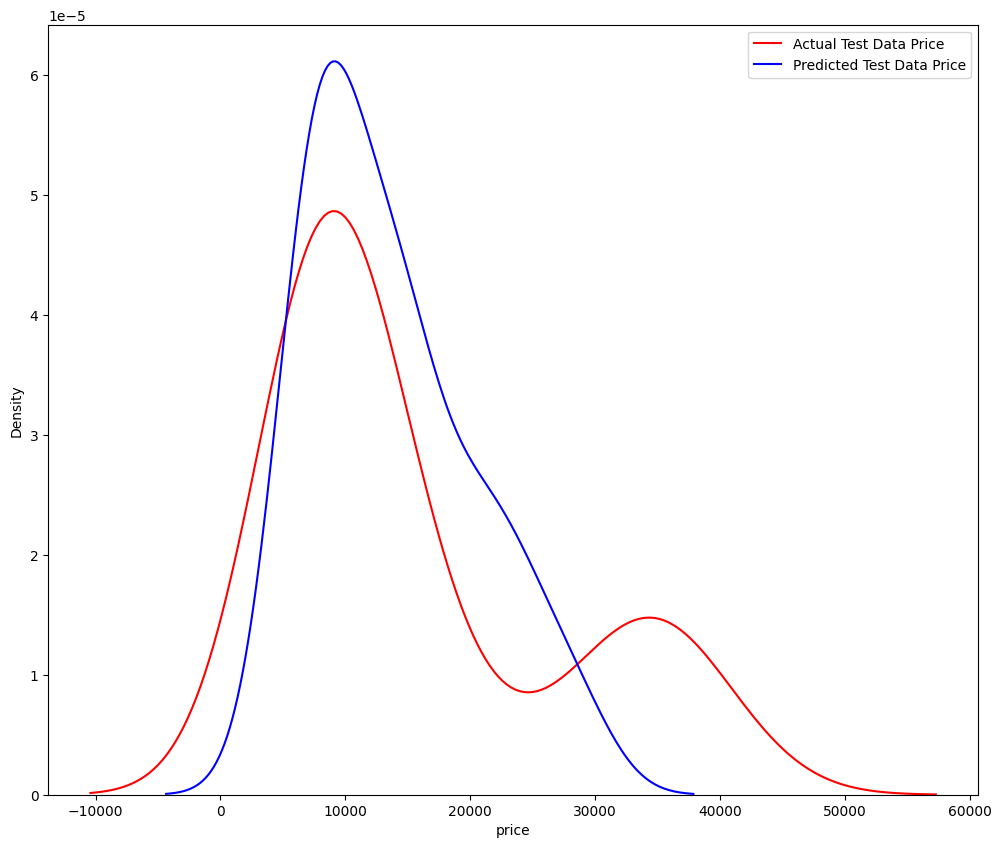

In [87]:
plt.figure(figsize=[12,10])
ax1 = sns.kdeplot(y_test,  color='r',label="Actual Test Data Price")
ax2 = sns.kdeplot(yhat_test,color='b',label="Predicted Test Data Price",ax=ax1)
plt.legend()

In [88]:
pr = PolynomialFeatures(degree=5)
X_train_pr = pr.fit_transform(X_train)
X_test_pr = pr.fit_transform(X_test)
pr

,degree,5
,interaction_only,False
,include_bias,True
,order,'C'


In [89]:
poly = LinearRegression()
poly.fit(X_train_pr, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [90]:
yhat = poly.predict(X_test_pr)
yhat[0:5]

array([ 7239.76796311, 25799.80528296,  8343.02697424,  7378.8262279 ,
       14132.02730315])

In [91]:
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [ 7239.76796311 25799.80528296  8343.02697424  7378.8262279 ]
True values: [ 8249. 41315.  6855.  9258.]


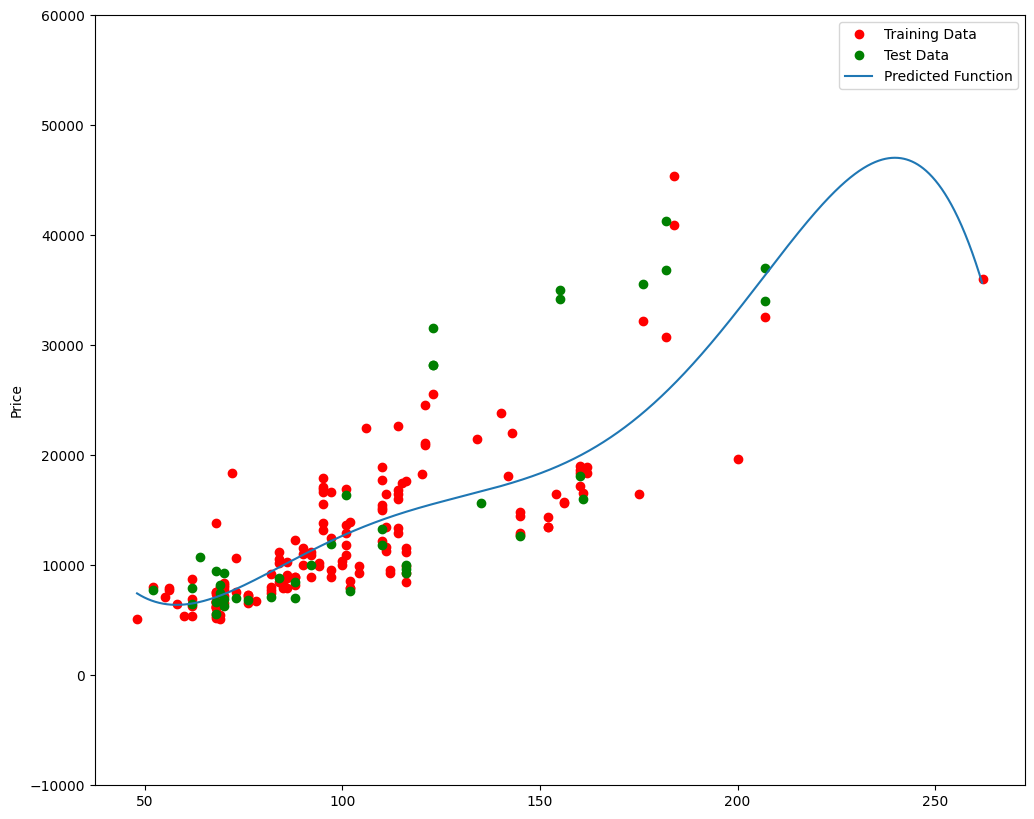

In [92]:
PollyPlot(X_train, X_test, y_train, y_test, poly,pr)

In [93]:
poly.score(X_train_pr,y_train)

0.6652871068708315

In [94]:
poly.score(X_test_pr, y_test)

0.6403782610327328

In [95]:
X_test.columns

Index(['horsepower'], dtype='object')

Text(0.5, 1.0, 'R^2 Using Test Data')

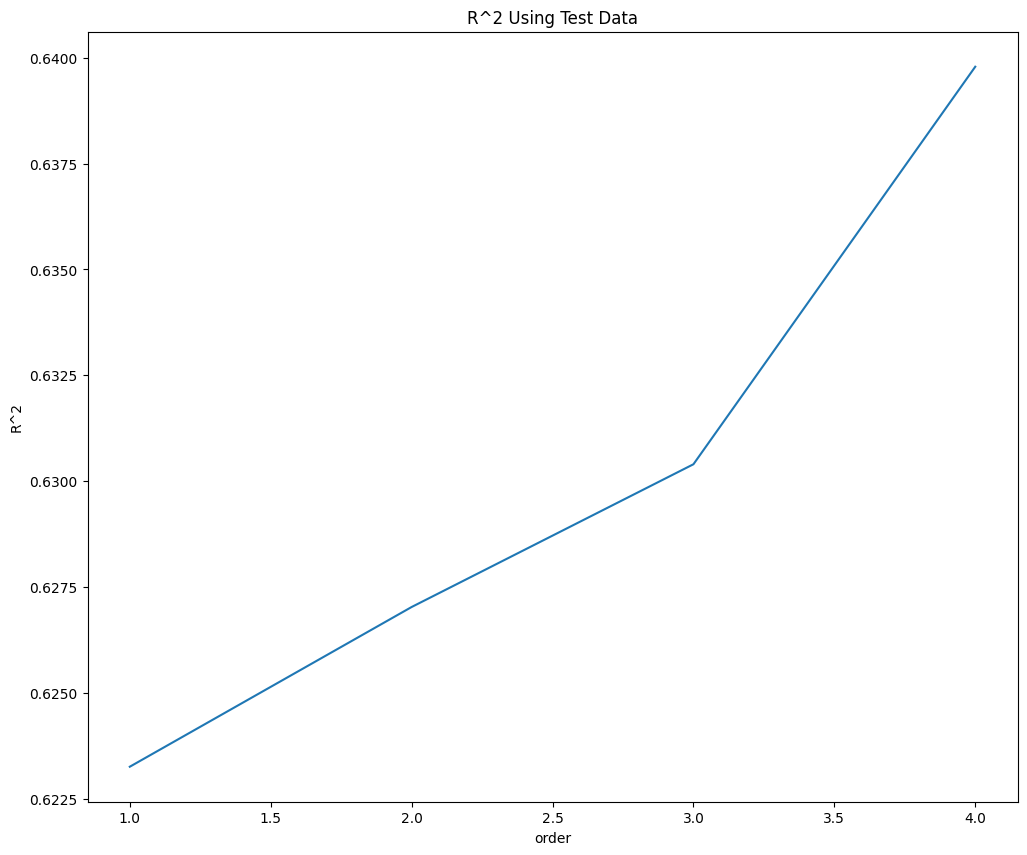

In [98]:
Rsqu_test = []
order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    X_train_pr = pr.fit_transform(X_train)
    
    X_test_pr = pr.fit_transform(X_test)    
    
    poly.fit(X_train_pr, y_train)
    
    Rsqu_test.append(poly.score(X_test_pr, y_test))
plt.figure(figsize=[12,10])
plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
#plt.text(3, 0.75, 'Maximum R^2 ') 

In [102]:
pr2 = PolynomialFeatures(degree=2)

In [117]:
X4 = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
y4 = df['price']
X4_train,X4_test,y4_train,y4_test = train_test_split(X4,y4, test_size=0.2, random_state=1)

In [123]:
X4_train_pr2 = pr2.fit_transform(X4_train,y4_train)
X4_test_pr2 = pr2.fit_transform(X4_test,y4_test)

In [143]:
poly2 = LinearRegression().fit(X4_train_pr2,y4_train)
poly2

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [149]:
y4hat_test = poly2.predict(X4_test_pr2)

/var/folders/vr/zjpq5dd116q29x13knn7gxb00000gn/T/ipykernel_83823/4155015827.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y4_test,hist=False,color='r',label="Y4 Test")
/var/folders/vr/zjpq5dd116q29x13knn7gxb00000gn/T/ipykernel_83823/4155015827.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6

<Axes: xlabel='price', ylabel='Density'>

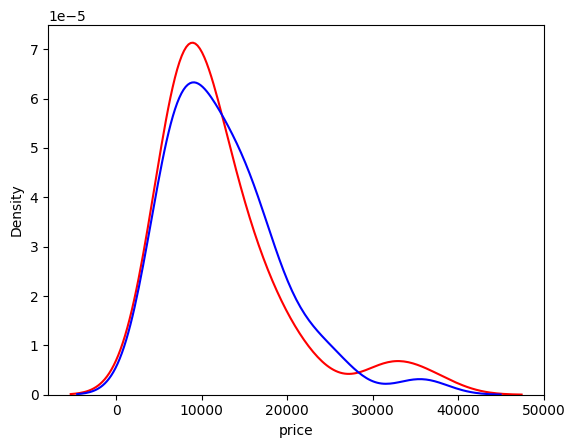

In [150]:
ax1 = sns.distplot(y4_test,hist=False,color='r',label="Y4 Test")
sns.distplot(y4hat_test,hist=False,color='b',label="Y4HAT Test")

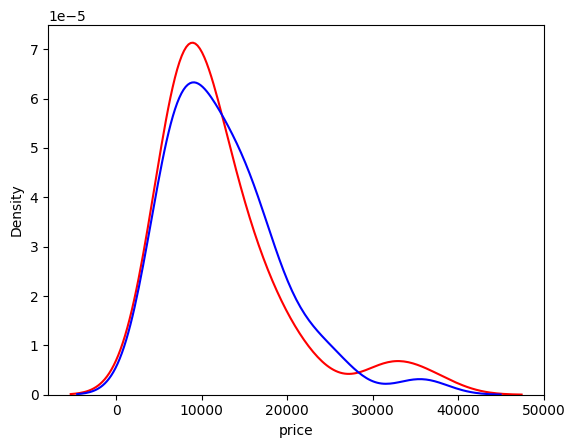

In [151]:
ax1 = sns.kdeplot(y4_test,color='r',label="Y4 Test")
ax2 = sns.kdeplot(y4hat_test, color='b',label="Y4HAT Test",ax=ax1)

In [161]:
RidgeModel = Ridge(alpha=5)

In [162]:
RidgeModel.fit(X4_train_pr2,y4_train)

,alpha,5
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [163]:
y4hat_ridge = RidgeModel.predict(X4_test_pr2)

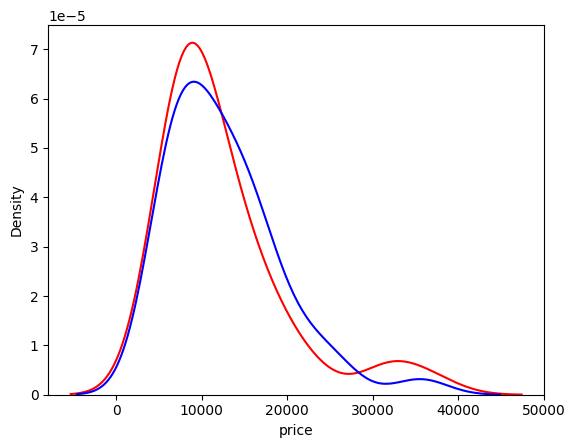

In [164]:
ax1 = sns.kdeplot(y4_test,color='r',label="Y4 Test")
ax2 = sns.kdeplot(y4hat_ridge, color='b',label="Y4HAT Test",ax=ax1)

In [165]:
y4hat_ridge[0:4]

array([10541.39474763,  5832.92631683, 10684.20409156,  6593.8156931 ])

In [168]:
y4_test[0:4].values

array([ 9549.,  6229., 10245.,  7295.])

In [169]:
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(X4_train_pr2, y4_train)
    test_score, train_score = RigeModel.score(X4_test_pr2, y4_test), RigeModel.score(X4_train_pr2, y4_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|███████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 837.51it/s, Test Score=0.771, Train Score=0.855]


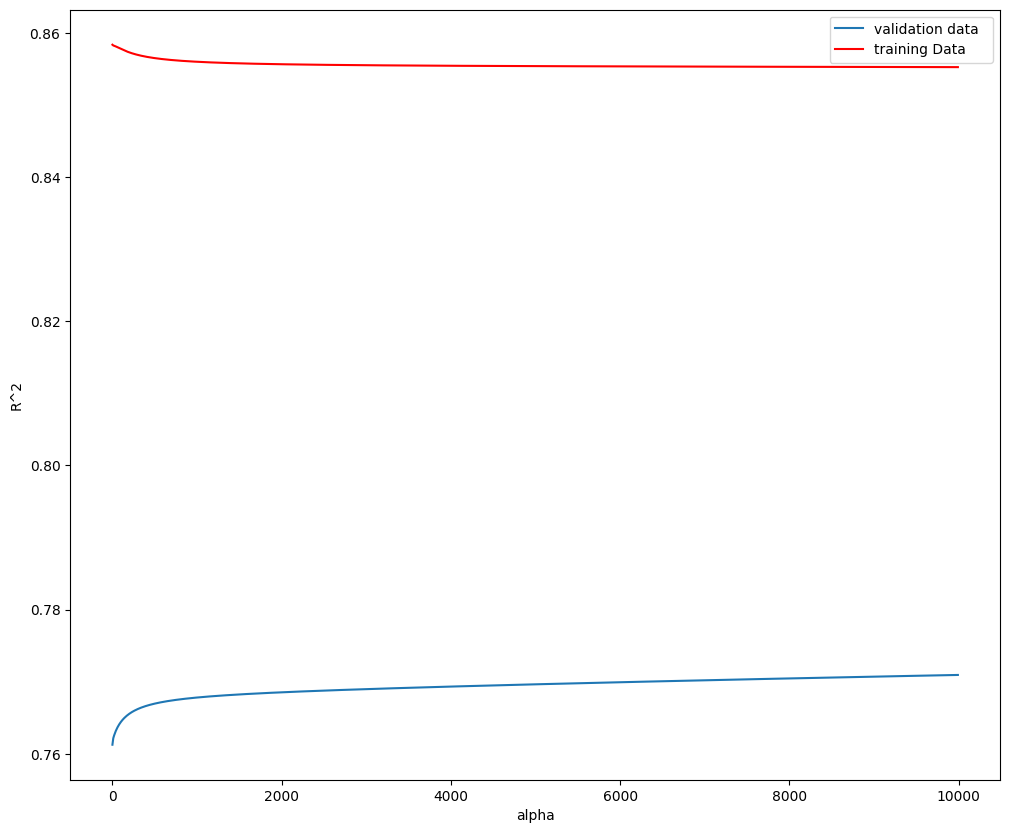

In [170]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

In [176]:
RidgeModel = Ridge(alpha=1)
RidgeModel.fit(X4_train_pr2,y4_train)
RidgeModel.score(X4_test_pr2,y4_test)

0.7615562635058315

In [177]:
from sklearn.model_selection import GridSearchCV

In [183]:
params1 = [{'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000,100000]}]
RM1 = Ridge()
Grid1 = GridSearchCV(RM1, params1,cv=4)
Grid1.fit(X4_train,y4_train)

,estimator,Ridge()
,param_grid,"[{'alpha': [0.0001, 0.001, ...]}]"
,scoring,None
,n_jobs,None
,refit,True
,cv,4
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,1000


In [184]:
Grid1.score(X4_test,y4_test)

0.7448650658229691

In [197]:
RM2=Ridge()
params2 = [{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]
Grid2 = GridSearchCV(RM2,params2,cv=10)
Grid2.fit(X4_train,y4_train)
best_alpha = Grid2.best_params_['alpha']
print("Best_Alpha: ",best_alpha)
RM_best = Ridge(alpha=best_alpha)
RM_best.fit(X4_train,y4_train)

Best_Alpha:  10000


,alpha,10000
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [198]:
RM_best.score(X4_test,y4_test)

0.7555596775182236